<a href="https://colab.research.google.com/github/sshubham3638/DataScience/blob/master/Sunny_Shubham_Help_Twitter_Combat_Hate_Speech_Using_NLP_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sunny Shubham
#### Help Twitter Combat Hate Speech Using NLP and Machine Learning.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Load the tweets file using read_csv function from Pandas package. 

In [ ]:
tweet_df = pd.read_csv("TwitterHate.csv")

In [ ]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
tweet_df.label.value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [ ]:
# checking out the negative comments from the train set
tweet_df[tweet_df['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# checking out the postive comments from the train set 

tweet_df[tweet_df['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<AxesSubplot:>

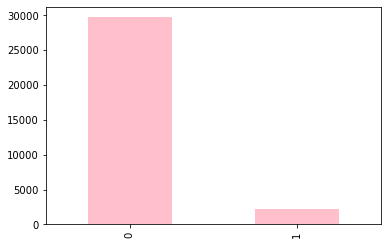

In [ ]:
tweet_df['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

### tweets cleanup and manipulation

In [ ]:
tweets = tweet_df.tweet.values

In [ ]:
tweets

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

#### Normalize the casing

In [ ]:
tweets_lower = [twt.lower() for twt in tweets]

#### Using regular expressions, remove user handles. These begin with '@’.

In [ ]:
import re
re.sub("@\w+","", "@Rahim this course rocks! http://rahimbaig.com/ai")
tweets_nouser = [re.sub("@\w+","", twt) for twt in tweets_lower]

In [ ]:
tweets_nouser[:5]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

#### Remove URLs

In [ ]:
re.sub("\w+://\S+","", "@Rahim this course rocks! http://rahimbaig.com/ai")
tweets_nourl = [re.sub("\w+://\S+","", twt) for twt in tweets_nouser]
tweets_nourl[:5]

['  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation']

#### Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tkn = TweetTokenizer()
tkn.tokenize(tweets_nourl[0])
tweet_token = [tkn.tokenize(sent) for sent in tweets_nourl]
print(tweet_token[0])

['when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', '.', '#run']


#### Removing stopwords, Removing redundant terms like ‘amp’, ‘rt’, etc. and Remove ‘#’

In [ ]:
from nltk.corpus import stopwords
from string import punctuation
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)
stop_punct.extend(['...','``',"''",".."])
stop_context = ['rt', 'amp']
stop_final = stop_nltk + stop_punct + stop_context

In [ ]:
#Extra cleanup by removing terms with a length of 1.
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in stop_final) & (len(term)>1))]

In [ ]:
del_stop(tweet_token[4])

['factsguide', 'society', 'motivation']

In [ ]:
tweets_clean = [del_stop(tweet) for tweet in tweet_token]

### Check out the top terms in the tweets:

    1.First, get all the tokenized terms into one large list.
    
    2.Use the counter and find the 10 most common terms.

In [ ]:
from collections import Counter

In [ ]:
term_list = []
for tweet in tweets_clean:
    term_list.extend(tweet)

In [ ]:
res = Counter(term_list)
res.most_common(10)

[('love', 2748),
 ('day', 2276),
 ('happy', 1684),
 ('time', 1131),
 ('life', 1118),
 ('like', 1047),
 ("i'm", 1018),
 ('today', 1013),
 ('new', 994),
 ('thankful', 946)]

#### Data formatting for predictive modeling:

    1.Join the tokens back to form strings. This will be required for the vectorizers.

    2.Assign x and y.

    3.Perform train_test_split using sklearn.

In [ ]:
tweets_clean[0]

['father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run']

In [ ]:
tweets_clean = [" ".join(tweet) for tweet in tweets_clean]

In [ ]:
tweets_clean[0]

'father dysfunctional selfish drags kids dysfunction run'

In [ ]:
len(tweets_clean)

31962

In [ ]:
len(tweet_df.label)

31962

In [ ]:
X = tweets_clean
y = tweet_df.label.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
len(X_train), len(X_test)

(22373, 9589)

In [ ]:
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
X_train_bow.shape, X_test_bow.shape

((22373, 5000), (9589, 5000))

### Model building: Ordinary Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_bow, y_train)

LogisticRegression()

In [ ]:
y_train_pred = logreg.predict(X_train_bow)
y_test_pred = logreg.predict(X_test_bow)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_train, y_train_pred)

0.9560184150538595

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     20815
           1       0.96      0.39      0.55      1558

    accuracy                           0.96     22373
   macro avg       0.96      0.69      0.76     22373
weighted avg       0.96      0.96      0.95     22373



In [ ]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train_bow, y_train)
y_train_pred = logreg.predict(X_train_bow)
y_test_pred = logreg.predict(X_test_bow)
accuracy_score(y_train, y_train_pred)

0.9527108568363652

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     20815
           1       0.60      0.97      0.74      1558

    accuracy                           0.95     22373
   macro avg       0.80      0.96      0.86     22373
weighted avg       0.97      0.95      0.96     22373



In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [0.01,0.1,1,10,100],
    'penalty': ["l1","l2"]
}
classifier_lr = LogisticRegression(class_weight="balanced")

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier_lr, param_grid = param_grid, 
                          cv = StratifiedKFold(4), n_jobs = -1, verbose = 1, scoring = "recall" )
grid_search.fit(X_train_bow, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight='balanced'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [ ]:
grid_search.best_estimator_

LogisticRegression(C=1, class_weight='balanced')

#### Using the best estimator to make predictions on the test set

In [ ]:
y_test_pred = grid_search.best_estimator_.predict(X_test_bow)

In [ ]:
y_train_pred = grid_search.best_estimator_.predict(X_train_bow)

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8905
           1       0.49      0.77      0.60       684

    accuracy                           0.93      9589
   macro avg       0.73      0.85      0.78      9589
weighted avg       0.95      0.93      0.93      9589

